<a href="https://colab.research.google.com/github/nongquocdat/AI/blob/main/Tien_Giay_Vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

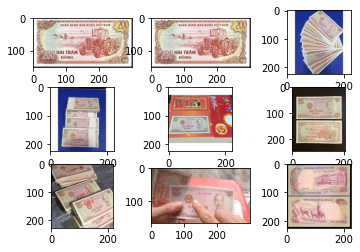

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/train/tien_giay_vn/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'200d'+str(i+1)+'.jfif'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [9]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/train/tien_giay_vn/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('200d'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500d'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('1000d'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('2000d'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('5000d'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('10000d'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('20000d'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(37, 200, 200, 3) (37,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 6s 762ms/step - loss: 2664.5037 - accuracy: 0.0541
Epoch 2/50
2/2 [==============================] - 3s 392ms/step - loss: 8759.0088 - accuracy: 0.0541
Epoch 3/50
2/2 [==============================] - 3s 384ms/step - loss: 3828.6614 - accuracy: 0.2973
Epoch 4/50
2/2 [==============================] - 3s 393ms/step - loss: 1039.9480 - accuracy: 0.2703
Epoch 5/50
2/2 [==============================] - 3s 376ms/step - loss: 634.4636 - accuracy: 0.3514
Epoch 6/50
2/2 [==============================] - 3s 389ms/step - loss: 228.0109 - accuracy: 0.4865
Epoch 7/50
2/2 [==============================] - 3s 374ms/step - loss: 84.2642 - accuracy: 0.4054
Epoch 8/50
2/2 [==============================] - 3s 387ms/step - loss: 19.7994 - accuracy: 0.5676
Epoch 9/50
2/2 [==============================] - 3s 377ms/step - loss: 13.4678 - accuracy: 0.6486
Epoch 10/50
2/2 [==============================] - 3s 387ms/step - loss: 2.9967 - accuracy: 0.7568


2/2 [==============================] - 1s 105ms/step - loss: 2.3004e-06 - accuracy: 1.0000


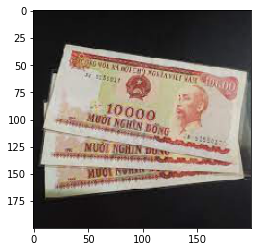

In [12]:
model.evaluate(photos,labels)
model.save('TienGiay_Final.h5')
from keras.models import load_model
models=load_model('TienGiay_Final.h5')
classes = ["200d","500d","1000d","2000d","5000d","10000d","20000d"]
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('10000d.jfif', target_size=(200,200))
plt.imshow(img)

In [13]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.09446865 0.09606158 0.07357386 0.13341062 0.05473218 0.16932127
  0.09035029 0.08134428 0.06032253 0.06655116 0.07986362]]


'10000d'